In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import TargetEncoder

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\car_price_prediction.csv")

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
data.drop(columns= ["ID","Doors"],inplace=True)

In [5]:
data.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2


In [6]:
data.Levy  = data.Levy.replace("-",np.nan)

In [7]:
data.Levy= pd.to_numeric(data.Levy)
data.Levy = data.Levy.fillna(value=int(data.Levy.mean())).astype(int)

In [8]:
data.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2


In [9]:
data["Mileage"] = data["Mileage"].str.replace(" km", "")
data["Mileage"] = pd.to_numeric(data["Mileage"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(5), object(10)
memo

In [11]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


In [12]:
data["Engine volume"] = data["Engine volume"].str.replace("Turbo", "")
data["Engine volume"] = pd.to_numeric(data["Engine volume"])

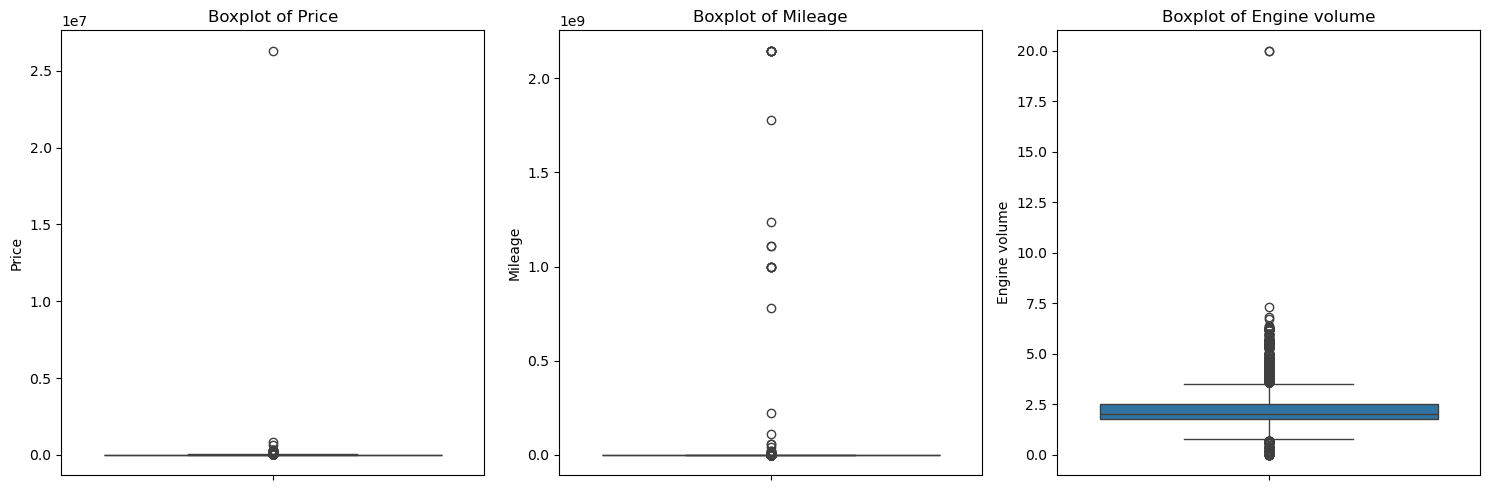

In [13]:
columns_to_plot = ['Price', 'Mileage', 'Engine volume']

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [14]:
data.Price.skew()

np.float64(136.47042654268714)

In [15]:
data.duplicated().sum()

np.int64(3512)

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.Price.skew()

np.float64(123.6340713570889)

In [19]:
data["Price_log"] = np.log(data["Price"])
print(data["Price_log"].skew())

-1.8175825738238938


In [20]:
data["Price_log"] = np.log1p(data["Price"])
print(data["Price_log"].skew())

-1.7938697666327585


<Axes: ylabel='Price_log'>

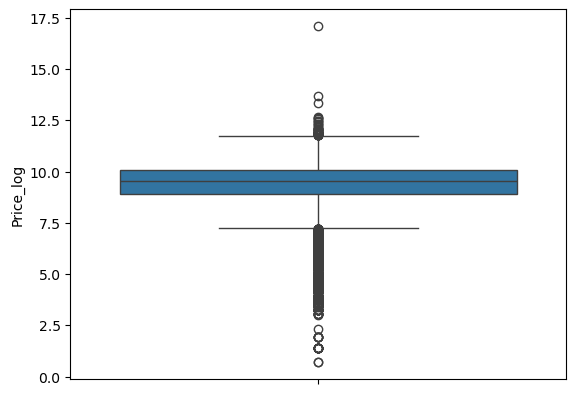

In [21]:
sns.boxplot(y=data["Price_log"])

In [22]:
Q1 = data["Price_log"].quantile(0.25)
Q3 = data["Price_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = data[(data["Price_log"] >= lower_bound) & (data["Price_log"] <= upper_bound)]

In [23]:
data.shape , df_clean.shape

((15725, 17), (14125, 17))

<Axes: ylabel='Price_log'>

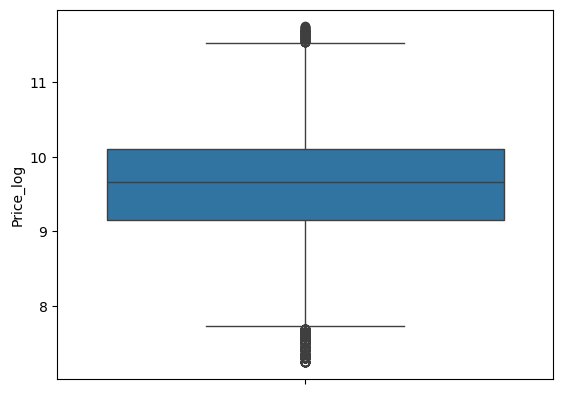

In [24]:
sns.boxplot(y=df_clean["Price_log"])


In [25]:
df_clean["Price_log"].skew()

np.float64(-0.33177651497114163)

<Axes: >

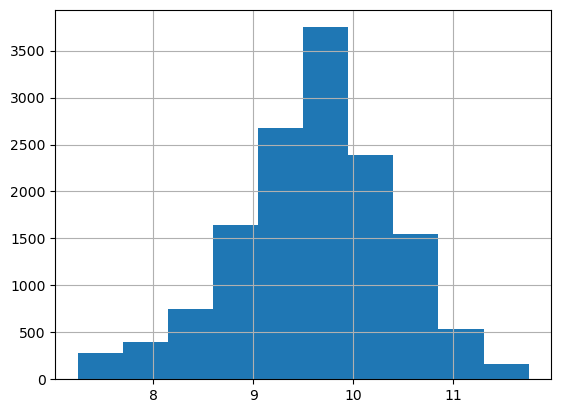

In [26]:
df_clean["Price_log"].hist()

<Axes: ylabel='Mileage'>

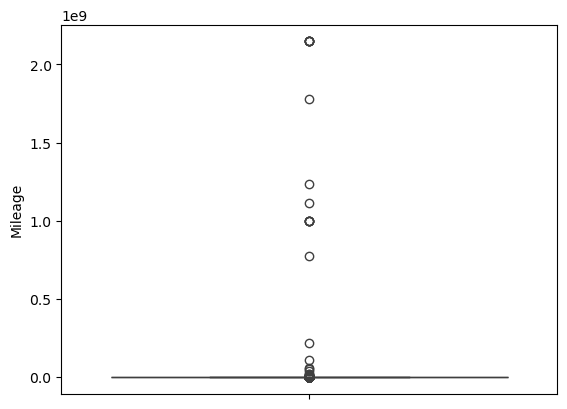

In [27]:
sns.boxplot(y=df_clean["Mileage"])

In [28]:
df_clean["Mileage"].skew()

np.float64(35.59856847357023)

In [30]:
df_clean["Mileage_log"] = np.log(df_clean["Mileage"])


C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2496\4005199003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Mileage_log"] = np.log(df_clean["Mileage"])


In [31]:
df_clean["Mileage_log"].skew()

C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


np.float64(nan)

In [32]:
df_clean["Mileage_log"] = np.log1p(df_clean["Mileage"])


C:\Users\DELL\AppData\Local\Temp\ipykernel_2496\625302387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Mileage_log"] = np.log1p(df_clean["Mileage"])


In [33]:
df_clean["Mileage_log"].skew()

np.float64(-3.6879460889107385)

<Axes: ylabel='Mileage_log'>

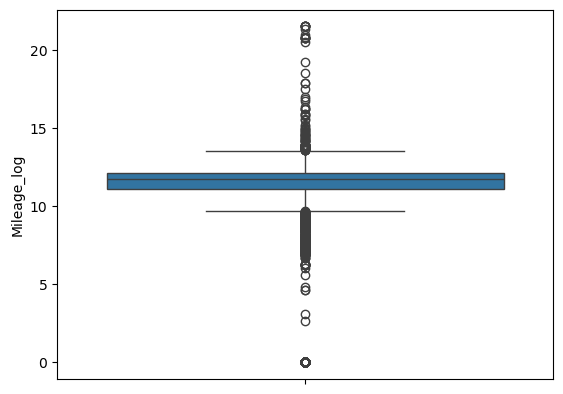

In [34]:
sns.boxplot(y=df_clean["Mileage_log"])


In [35]:
df_clean.shape

(14125, 18)

In [36]:
Q1 = df_clean["Price_log"].quantile(0.25)
Q3 = df_clean["Price_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean["Price_log"] >= lower_bound) & (df_clean["Price_log"] <= upper_bound)]

In [37]:
df_clean.shape


(13787, 18)

<Axes: ylabel='Mileage_log'>

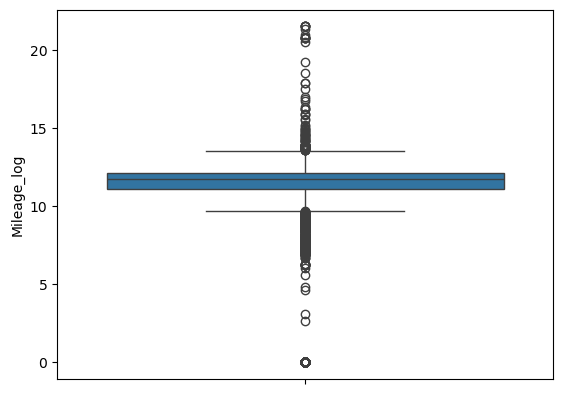

In [38]:
sns.boxplot(y=df_clean["Mileage_log"])


In [39]:
df_clean.Mileage_log.skew()

np.float64(-3.727233431941192)

In [40]:

Q1 = df_clean["Mileage_log"].quantile(0.25)
Q3 = df_clean["Mileage_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean["Mileage_log"] >= lower_bound) & (df_clean["Mileage_log"] <= upper_bound)]

In [41]:
df_clean.Mileage_log.skew()

np.float64(-0.5373419638612912)

<Axes: ylabel='Mileage_log'>

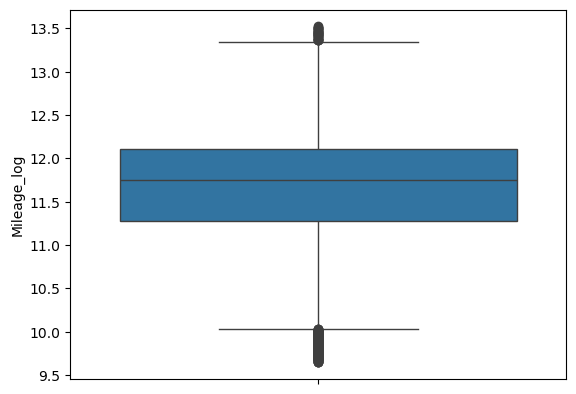

In [42]:
sns.boxplot(y=df_clean["Mileage_log"])

<Axes: ylabel='Engine volume'>

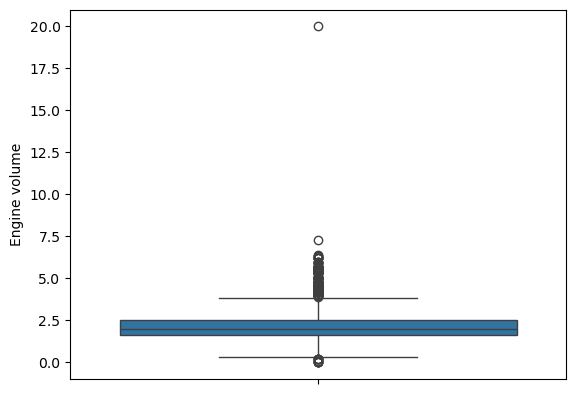

In [44]:
sns.boxplot(y=df_clean["Engine volume"])


In [45]:
df_clean["Engine volume"].skew()

np.float64(2.5699438926253966)

In [46]:
df_clean["Volume_log"] = np.log(df_clean["Engine volume"])


C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
df_clean["Volume_log"] = np.log1p(df_clean["Engine volume"])


In [48]:
df_clean["Volume_log"].skew()

np.float64(0.8526942929209631)

<Axes: ylabel='Volume_log'>

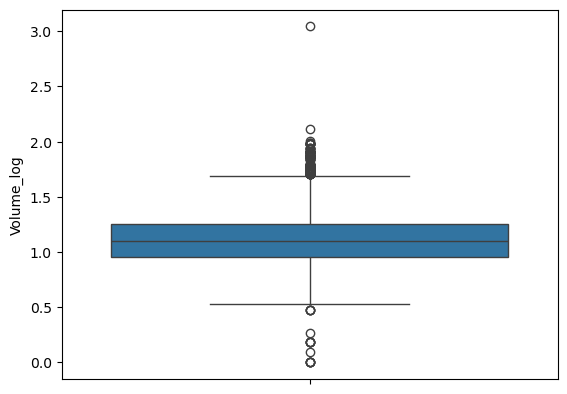

In [49]:
sns.boxplot(y=df_clean["Volume_log"])


In [50]:
df_clean.shape

(12650, 19)

In [51]:
Q1 = df_clean["Volume_log"].quantile(0.25)
Q3 = df_clean["Volume_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean["Volume_log"] >= lower_bound) & (df_clean["Volume_log"] <= upper_bound)]

In [52]:
df_clean.shape

(12309, 19)

<Axes: ylabel='Volume_log'>

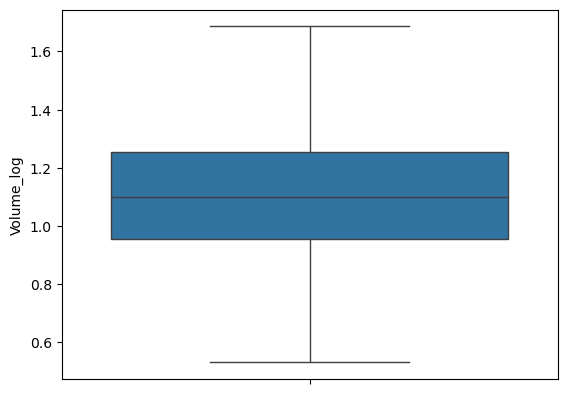

In [53]:
sns.boxplot(y=df_clean["Volume_log"])


In [54]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,8.190909,12.037459,1.252763
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9.369649,11.428478,0.832909


In [55]:
data = df_clean.drop(columns=["Model","Price","Mileage","Engine volume"])

In [57]:
data.head(3)

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,1399,LEXUS,2010,Jeep,Yes,Hybrid,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,1018,CHEVROLET,2011,Jeep,No,Petrol,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,906,HONDA,2006,Hatchback,No,Petrol,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909


<Axes: xlabel='count', ylabel='Manufacturer'>

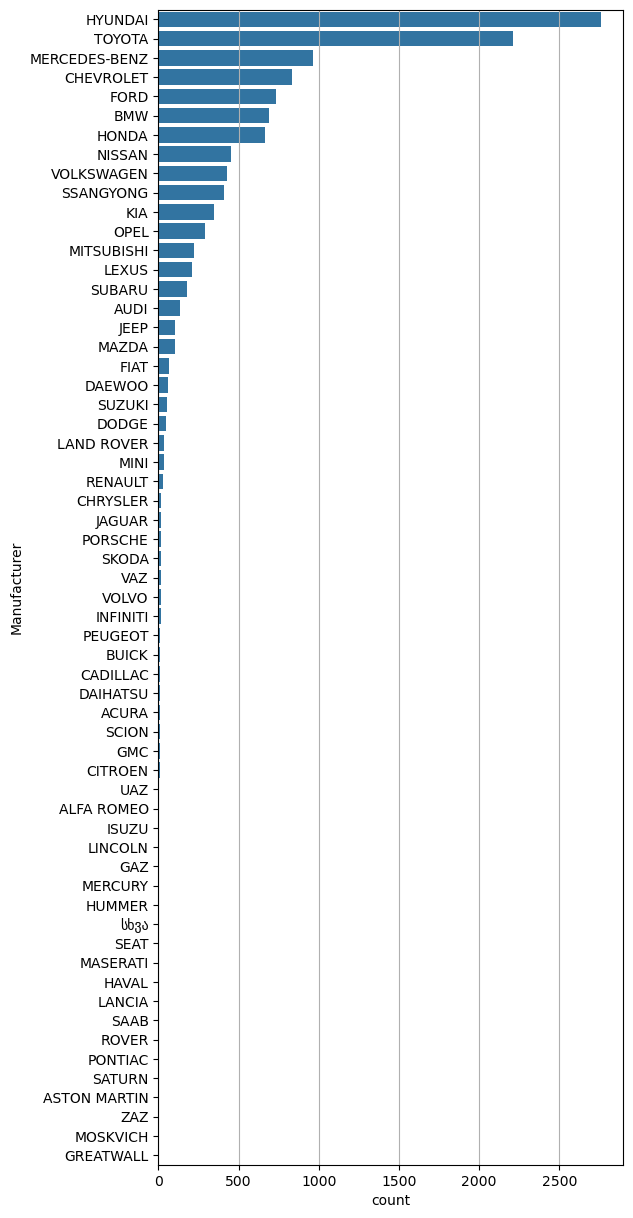

In [58]:
plt.figure(figsize=(6, 15))
plt.grid()
sns.barplot(data.Manufacturer.value_counts(),orient="y")

In [59]:
rare = data.Manufacturer.value_counts()

In [60]:
Others =  list(dict(rare[rare < 50]).keys())
data.Manufacturer = data.Manufacturer.apply(lambda x: "Others" if x in Others else x)

In [61]:
data.Manufacturer.value_counts()

Manufacturer
HYUNDAI          2762
TOYOTA           2211
MERCEDES-BENZ     966
CHEVROLET         831
FORD              731
BMW               690
HONDA             667
NISSAN            454
VOLKSWAGEN        425
SSANGYONG         411
Others            382
KIA               347
OPEL              292
MITSUBISHI        224
LEXUS             212
SUBARU            179
AUDI              137
JEEP              106
MAZDA             104
FIAT               63
DAEWOO             61
SUZUKI             54
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Manufacturer'>

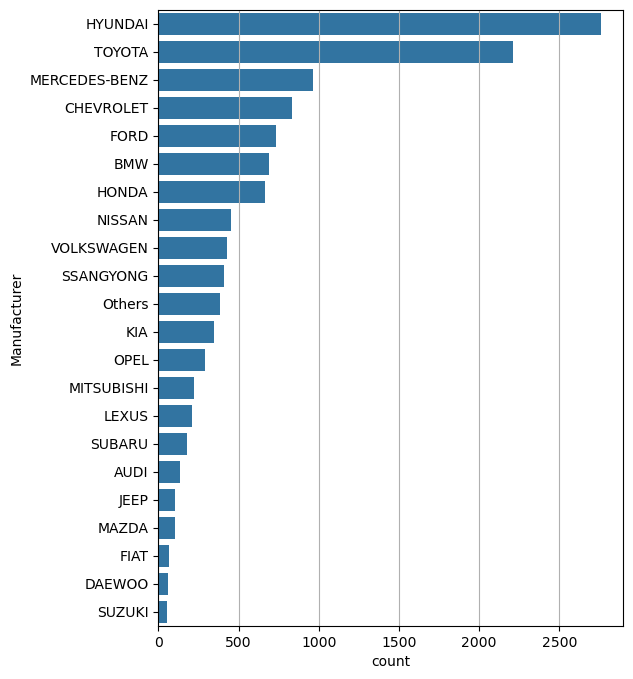

In [62]:
plt.figure(figsize=(6, 8))
plt.grid()
sns.barplot(data.Manufacturer.value_counts(),orient="y")

In [63]:
data.head(3)

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,1399,LEXUS,2010,Jeep,Yes,Hybrid,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,1018,CHEVROLET,2011,Jeep,No,Petrol,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,906,HONDA,2006,Hatchback,No,Petrol,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909


In [64]:
data["Prod. year"].value_counts()

Prod. year
2012    1375
2013    1298
2014    1294
2016    1027
2015    1018
2011     985
2010     902
2017     592
2008     438
2009     414
2007     365
2005     289
2004     269
2003     255
2018     250
2006     236
2002     221
2000     209
2001     192
1999     141
1998     136
1997      99
2019      73
1996      69
1995      60
1994      27
1992      16
1993      14
2020       9
1990       8
1988       5
1989       4
1991       4
1987       4
1986       2
1953       2
1984       1
1964       1
1985       1
1980       1
1982       1
1981       1
1977       1
Name: count, dtype: int64

In [65]:
scaler = StandardScaler()
data["Levy"] = scaler.fit_transform(data[["Levy"]])
data["Prod. year"] = scaler.fit_transform(data[["Prod. year"]])
data["Cylinders"] = scaler.fit_transform(data[["Cylinders"]])
data["Airbags"] = scaler.fit_transform(data[["Airbags"]])
data["Volume_log"] = scaler.fit_transform(data[["Volume_log"]])
data["Mileage_log"] = scaler.fit_transform(data[["Mileage_log"]])
data["Price_log"] = scaler.fit_transform(data[["Price_log"]])

In [67]:
data.head(3)

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,1.877277,LEXUS,-0.135500,Jeep,Yes,Hybrid,1.800912,Automatic,4x4,Left wheel,Silver,1.532002,-0.239418,0.712506,2.081463
1,0.552275,CHEVROLET,0.049942,Jeep,No,Petrol,1.800912,Tiptronic,4x4,Left wheel,Black,0.472612,0.077819,0.760311,1.446119
2,0.162773,HONDA,-0.877269,Hatchback,No,Petrol,-0.378454,Variator,Front,Right-hand drive,Black,-1.116474,-0.891247,0.821831,-1.538946


In [68]:
data.columns

Index(['Levy', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel',
       'Color', 'Airbags', 'Price_log', 'Mileage_log', 'Volume_log'],
      dtype='object')

In [121]:
x= data[['Levy', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel',
       'Color', 'Airbags', 'Mileage_log', 'Volume_log']]
y = data["Price_log"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [123]:
cat_cols = x.select_dtypes(include='object').columns


In [124]:
encoder = TargetEncoder()
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols], y_train)
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

In [125]:
svr = SVR(kernel="rbf",
        C=300,
        epsilon=0.5)
svr.fit(X_train, y_train)

SVR(C=300, epsilon=0.5)

In [126]:
predicted = svr.predict(X_test)

In [127]:
mean_squared_error(y_test,predicted)

0.4206126825414127

In [128]:
r2_score(y_test,predicted)

0.5723520826752835

In [129]:
## Descision tree
tree = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [130]:
pred = tree.predict(X_test)

In [131]:
mean_squared_error(y_test,pred)

0.4087820924516652

In [132]:
r2_score(y_test,pred)

0.5843805531009341

In [133]:
## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [134]:
pred2 = lr.predict(X_test)

In [135]:
mean_squared_error(y_test,pred2)

0.5698123705628534

In [136]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [137]:
pred = lasso.predict(X_test)

In [138]:
mean_squared_error(y_test,pred)

0.9836494575392281

In [139]:
r2_score(y_test,pred)

-0.00010213518186330539

In [140]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [141]:
pred = ridge.predict(X_test)
mean_squared_error(pred,y_test)

0.5698458196300662

In [142]:
r2_score(pred,y_test)

-0.44057179855727013